# Chapter 14 Time Series - Some simple manipulations and applications in quantitative investment

Time series are very common in economics and finance, e.g., the macroeconomic variable series and time series of financial products and factor.
- GDP, inflation rates and interest rates
- Stock price level, stock returns and others

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

## Date and Time Data Types and Tools

How you mark and refer to time series data depends on the application, and you may have one of the following:

- *Timestamps*, specific instants in time
- Fixed *periods*, such as the month January 2007 or the full year 2010
- *Intervals* of time, indicated by a start and end timestamp. Periods can be thought of as special cases of intervals

The Python standard library includes data types for date and time data, as well as calendar-related functionality. 
- datetime modules
- time modules
- calendar modules 

are the main places to start. 

The datetime.datetime type, or simply datetime, is widely used:

In [3]:
from datetime import datetime
now = datetime.now()
print(type(now))
now

<class 'datetime.datetime'>


datetime.datetime(2020, 11, 17, 11, 8, 59, 769546)

In [4]:
now.year, now.month, now.day

(2020, 11, 17)

**datetime** stores both the date and time down to the microsecond. 

How to define the difference between two dates?

*timedelta* represents the temporal difference between two datetime objects:

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(926, 56700)

In [7]:
delta.days, delta.seconds

(926, 56700)

You can add (or subtract) a timedelta or multiple thereof to a datetime object to
yield a new shifted object:

In [8]:
from datetime import timedelta

In [9]:
start = datetime(2011, 1, 7)

In [10]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

Types in datetime module

|Type     |Description|
|---------|-------------------------------------------------------------------|
|date     |Store calendar date (year, month, day) using the Gregorian calendar|
|time     |Store time of day as hours, minutes, seconds, and microseconds     |
|datetime |Stores both date and time                                          |
|timedelta| Represents the difference between twodatetimevalues (as days, seconds, and microseconds)                                                                 |
|tzinfo   |Base type for storing time zone information                        |

**Converting Between String and Datetime**

In [12]:
stamp = datetime(2011, 1, 3)

In [13]:
str(stamp)

'2011-01-03 00:00:00'

In [14]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

|Type | Description |
|-----|-------------------------------|
|%Y | Four-digit year |
|%y | Two-digit year  |
|%m | Two-digit month [01, 12] |
|%d | Two-digit day [01, 31]   |
|%H | Hour (24-hour clock) [00, 23] |
|%I | Hour (12-hour clock) [01, 12] |
|%M | Two-digit minute [00, 59]  |
|%S | Second [00, 61] (seconds 60, 61 account for leap seconds) %w Weekday as integer [0 (Sunday), 6] |
|%U | Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0” |
|%W | Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday of the year are “week 0” |

In [15]:
value = '2011-01-03'

In [16]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
datestrs = ['7/6/2011', '8/6/2011']

In [18]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

**datetime.strptime** is a good way to parse a date with a known format. 

However, it can be a bit annoying to have to write a format spec each time, especially for common date formats. 

In this case, you can use the **parser.parse** method in the third-party dateutil package (this is installed automatically when you install pandas):


In [19]:
from dateutil.parser import parse

In [20]:
help(parse)

Help on function parse in module dateutil.parser._parser:

parse(timestr, parserinfo=None, **kwargs)
    Parse a string in one of the supported formats, using the
    ``parserinfo`` parameters.
    
    :param timestr:
        A string containing a date/time stamp.
    
    :param parserinfo:
        A :class:`parserinfo` object containing parameters for the parser.
        If ``None``, the default arguments to the :class:`parserinfo`
        constructor are used.
    
    The ``**kwargs`` parameter takes the following keyword arguments:
    
    :param default:
        The default datetime object, if this is a datetime object and not
        ``None``, elements specified in ``timestr`` replace elements in the
        default object.
    
    :param ignoretz:
        If set ``True``, time zones in parsed strings are ignored and a naive
        :class:`datetime` object is returned.
    
    :param tzinfos:
        Additional time zone names / aliases which may be present in the
        s

In [21]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [23]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

**pandas** is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame. 

The **pd.to_datetime** method parses many different kinds of date representations. 

In [24]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [25]:
datestrs

['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [26]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [27]:
pd.to_datetime(datestrs)[0]

Timestamp('2011-07-06 12:00:00')

# Question:
提取茅台和万科A的历史数据，取它们的收盘价以时间为index组成新的dataframe，并计算各自收盘价的5天移动平均线。

In [1]:
import tushare as ts
MaoTai = ts.get_hist_data('600519')
WanKe  = ts.get_hist_data('000002')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


## Time Series Basics

In [34]:
import datetime as date
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [35]:
dates[0]

datetime.datetime(2011, 1, 2, 0, 0)

In [36]:
ts = pd.Series(np.random.randn(6), index=dates)

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

A Timestamp can be substituted anywhere you would use a datetime object. 

**Indexing, Selection, Subsetting**

Time series behaves like any other pandas. Series when you are indexing and selecting data based on label:

In [39]:
ts

2011-01-02    0.405562
2011-01-05   -1.551280
2011-01-07   -0.114874
2011-01-08   -0.053630
2011-01-10    0.745292
2011-01-12   -0.110076
dtype: float64

In [40]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [41]:
ts[stamp]

-0.11487352354052761

*As a convenience, you can also pass a string that is interpretable as a date:*

In [42]:
ts['1/10/2011']

0.745292281273455

In [43]:
ts['2011-1-10']

0.745292281273455

In [44]:
ts['20110110']

0.745292281273455

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [45]:
np.random.seed(100)
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [46]:
longer_ts.head()

2000-01-01   -1.749765
2000-01-02    0.342680
2000-01-03    1.153036
2000-01-04   -0.252436
2000-01-05    0.981321
Freq: D, dtype: float64

In [47]:
longer_ts['2001'].head(30)
# Here, the string '2001' is interpreted as a year and selects that time period. This also
# works if you specify the month:

2001-01-01   -0.405083
2001-01-02    0.536444
2001-01-03   -2.131315
2001-01-04    0.263077
2001-01-05   -1.271058
2001-01-06    0.929100
2001-01-07   -1.931413
2001-01-08    0.024215
2001-01-09   -1.213692
2001-01-10    0.188137
2001-01-11   -0.572264
2001-01-12    2.745118
2001-01-13    0.124954
2001-01-14   -1.065246
2001-01-15    0.603054
2001-01-16   -1.061468
2001-01-17   -1.516430
2001-01-18    0.329283
2001-01-19   -1.983621
2001-01-20    0.167137
2001-01-21   -0.178894
2001-01-22    1.178239
2001-01-23   -0.443408
2001-01-24    0.738954
2001-01-25   -0.154848
2001-01-26   -0.086056
2001-01-27   -0.335757
2001-01-28   -0.136629
2001-01-29    0.092776
2001-01-30    0.189719
Freq: D, dtype: float64

In [48]:
longer_ts['2001-05']

2001-05-01   -0.236582
2001-05-02    0.979141
2001-05-03    1.093748
2001-05-04   -1.383622
2001-05-05    1.010134
2001-05-06    0.872663
2001-05-07    1.037612
2001-05-08    0.302548
2001-05-09   -1.298117
2001-05-10    0.847864
2001-05-11   -0.268876
2001-05-12    0.301983
2001-05-13   -2.271905
2001-05-14    0.757605
2001-05-15    0.876051
2001-05-16    2.156220
2001-05-17    1.288703
2001-05-18   -0.142535
2001-05-19    1.665905
2001-05-20   -1.380114
2001-05-21    3.857940
2001-05-22    3.075574
2001-05-23    0.830820
2001-05-24   -0.878268
2001-05-25    0.139862
2001-05-26    0.712539
2001-05-27    0.359624
2001-05-28    0.712748
2001-05-29    1.068786
2001-05-30   -0.495174
2001-05-31    0.132962
Freq: D, dtype: float64

Slicing with datetime objects works as well:

In [49]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.114874
2011-01-08   -0.053630
2011-01-10    0.745292
2011-01-12   -0.110076
dtype: float64

In [50]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.114874
2011-01-08   -0.053630
2011-01-10    0.745292
dtype: float64

In [ ]:
# 取茅台2019年12月的数据
MaoTai['2019-12']

As before, you can pass either a string date, datetime, or timestamp. Remember that slicing in this manner produces views on the source time series like slicing NumPy arrays. 

All of this holds true for DataFrame as well, indexing on its rows:

In [52]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [53]:
np.random.seed(100)
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [54]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-2.132910,0.759204,-0.285181,0.480411
2001-05-09,0.468001,2.709002,2.019086,0.747403
2001-05-16,-0.589709,-0.813425,-0.176897,0.507048
2001-05-23,-0.266778,-0.856062,1.559315,-1.092689
2001-05-30,0.758042,-1.199440,0.176370,-0.875731


## Date Ranges, Frequencies, and Shifting

Generic time series in pandas are assumed to be irregular; 
- that is, they have no fixed frequency. 

For many applications this is sufficient. However, it’s often desirable to work relative to a fixed frequency, such as 
- daily, 
- monthly, 
- or every 15 minutes, 
even if that means introducing missing values into a time series. 

Fortunately pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed-frequency date ranges.

**Generating Date Ranges**

While I used it previously without explanation, **pandas.date_range** is responsible for generating a DatetimeIndex with an indicated length according to a particular frequency:

In [55]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : integer, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/end dates to midnight before generating dat

In [56]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By default, **date_range** generates daily **timestamps**. If you pass only a start or end
date, you must pass a number of periods to generate:

In [57]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [59]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

<img src='Chapter17fig1.png'>

<img src='Chapter17fig2.png'>

**Frequencies and Date Offsets**

Frequencies in pandas are composed of a base frequency and a multiplier. 

Base frequencies are typically referred to by a string alias, 
- like 'M' for monthly or 'H' for hourly. 

In [60]:
from pandas.tseries.offsets import Hour, Minute
Hour(4)

<4 * Hours>

In [61]:
Hour(2) + Minute(30)

<150 * Minutes>

In [62]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [63]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')[0]

Timestamp('2000-01-01 00:00:00', freq='4H')

In [64]:
pd.date_range('2000-01-01', periods=10, freq='10min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:10:00',
               '2000-01-01 00:20:00', '2000-01-01 00:30:00',
               '2000-01-01 00:40:00', '2000-01-01 00:50:00',
               '2000-01-01 01:00:00', '2000-01-01 01:10:00',
               '2000-01-01 01:20:00', '2000-01-01 01:30:00'],
              dtype='datetime64[ns]', freq='10T')

**Week of month dates**

One useful frequency class is “week of month,” starting with WOM. This enables you to get dates like the third Friday of each month:

In [65]:
rng = pd.date_range('2019-01-01', '2019-09-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2019-01-18', '2019-02-15', '2019-03-15', '2019-04-19',
               '2019-05-17', '2019-06-21', '2019-07-19', '2019-08-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

**Shifting (Leading and Lagging) Data**

“Shifting” refers to moving data backward and forward through time. 

Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified:

In [66]:
np.random.seed(100)
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -1.749765
2000-02-29    0.342680
2000-03-31    1.153036
2000-04-30   -0.252436
Freq: M, dtype: float64

In [67]:
ts.index[0]

Timestamp('2000-01-31 00:00:00', freq='M')

In [68]:
tmp = pd.concat([ts,ts.shift(1)],axis = 1)
tmp.columns =  ['rt','rtlag']
tmp

,rt,rtlag
2000-01-31,-1.749765,NaN
2000-02-29,0.342680,-1.749765
2000-03-31,1.153036,0.342680
2000-04-30,-0.252436,1.153036


In [69]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.749765
2000-04-30    0.342680
Freq: M, dtype: float64

In [70]:
tmp = pd.concat([ts,ts.shift(1),ts.shift(2)],axis = 1)
tmp.columns =  ['rt','rtlag','rtlag2']
tmp

,rt,rtlag,rtlag2
2000-01-31,-1.749765,NaN,NaN
2000-02-29,0.342680,-1.749765,NaN
2000-03-31,1.153036,0.342680,-1.749765
2000-04-30,-0.252436,1.153036,0.342680


In [71]:
ts.shift(-2)

2000-01-31    1.153036
2000-02-29   -0.252436
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [72]:
ts

2000-01-31   -1.749765
2000-02-29    0.342680
2000-03-31    1.153036
2000-04-30   -0.252436
Freq: M, dtype: float64

When we shift like this, missing data is introduced either at the start or the end of the time series.


A common use of shift is computing percent changes in a time series or multiple time series as DataFrame columns. This is expressed as:


In [84]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -1.195844
2000-03-31    2.364756
2000-04-30   -1.218932
Freq: M, dtype: float64

In [85]:
 ts.shift(1)

2000-01-31         NaN
2000-02-29   -1.749765
2000-03-31    0.342680
2000-04-30    1.153036
Freq: M, dtype: float64

In [86]:
ts/ ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -1.195844
2000-03-31    2.364756
2000-04-30   -1.218932
Freq: M, dtype: float64

In [87]:
ts.pct_change()

2000-01-31         NaN
2000-02-29   -1.195844
2000-03-31    2.364756
2000-04-30   -1.218932
Freq: M, dtype: float64

**Shifting dates with offsets**

In [88]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now

datetime.datetime(2011, 11, 17, 0, 0)

In [89]:
pd.to_datetime(now + 3 * Day())

Timestamp('2011-11-20 00:00:00')

If you add an anchored offset like MonthEnd, the first increment will “roll forward” a
date to the next date according to the frequency rule:

In [90]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [91]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [92]:
now + MonthEnd(3)

Timestamp('2012-01-31 00:00:00')

In [93]:
now - MonthEnd(2)

Timestamp('2011-09-30 00:00:00')

# Questions：
取茅台每周五和每周一的交易量变动百分比，是否存在什么区别？

## 17.4 Periods and Period Arithmetic

**Periods** represent timespans, 
- like days, 
- months, 
- quarters, 
- or years. 

The Period class represents this data type, requiring a string or integer and a frequency from table above:

In [94]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In this case, the Period object represents the full timespan from January 1, 2007, to December 31, 2007, inclusive. Conveniently, adding and subtracting integers from periods has the effect of shifting by their frequency:

In [95]:
p+5

Period('2012', 'A-DEC')

In [96]:
p-2

Period('2005', 'A-DEC')

If two periods have the same frequency, their difference is the number of units between them:

In [97]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

Regular ranges of periods can be constructed with the period_range function:

In [98]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [99]:
rng[0]

Period('2000-01', 'M')

The PeriodIndex class stores a sequence of periods and can serve as an axis index in any pandas data structure:

In [100]:
np.random.seed(100)
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.749765
2000-02    0.342680
2000-03    1.153036
2000-04   -0.252436
2000-05    0.981321
2000-06    0.514219
Freq: M, dtype: float64

If you have an array of strings, you can also use the PeriodIndex class:

In [101]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [102]:
pd.Period('2001Q3')

Period('2001Q3', 'Q-DEC')

In [103]:
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

**Period Frequency Conversion**

Periods and PeriodIndex objects can be converted to another frequency with their **asfreq** method. 

As an example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year. This is fairly straightforward:

In [104]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [105]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [106]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

Whole **PeriodIndex** objects or time series can be similarly converted with the same semantics:

In [107]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [108]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.221180
2007   -1.070043
2008   -0.189496
2009    0.255001
Freq: A-DEC, dtype: float64

In [109]:
ts.asfreq('M')

2006-12    0.221180
2007-12   -1.070043
2008-12   -0.189496
2009-12    0.255001
Freq: M, dtype: float64

In [110]:
ts.asfreq('M', how='start')

2006-01    0.221180
2007-01   -1.070043
2008-01   -0.189496
2009-01    0.255001
Freq: M, dtype: float64

In [111]:
pd.DataFrame(ts).asfreq('M', how='start')

,0
2006-01,0.221180
2007-01,-1.070043
2008-01,-0.189496
2009-01,0.255001


If we instead wanted the last business day of each year, we can use the 'B' frequency and indicate that we want the end of the period:

In [112]:
ts.asfreq('B', how='end')

2006-12-29    0.221180
2007-12-31   -1.070043
2008-12-31   -0.189496
2009-12-31    0.255001
Freq: B, dtype: float64

In [113]:
pd.DataFrame(ts).asfreq('B', how='end')

,0
2006-12-29,0.221180
2007-12-31,-1.070043
2008-12-31,-0.189496
2009-12-31,0.255001


**Quarterly Period Frequencies**

- Quarterly data is standard in accounting, finance, and other fields. 

- Much quarterly data is reported relative to a fiscal year end, typically the last calendar or business day of one of the 12 months of the year. 

Thus, the period 2012Q4 has a different meaning depending on fiscal year end. pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

In [114]:
p = pd.Period('2012Q4', freq='Q-DEC')
p

Period('2012Q4', 'Q-DEC')

In [115]:
p.asfreq(freq = 'D', how = 'start')

Period('2012-10-01', 'D')

In [116]:
p.asfreq(freq = 'D', how = 'end')

Period('2012-12-31', 'D')

Thus, it’s possible to do easy period arithmetic; 

- for example, to get the timestamp at 4 PM on the second-to-last business day of the quarter, you could do:

In [117]:
p.asfreq(freq = 'B', how = 'end') - 1

Period('2012-12-28', 'B')

In [118]:
pd.Period('2019-12-23',freq = 'B') - 1

Period('2019-12-20', 'B')

In [119]:
(p.asfreq(freq = 'B', how = 'end') - 1).asfreq('T', 's')

Period('2012-12-28 00:00', 'T')

In [120]:
p4pm = (p.asfreq(freq = 'B', how = 'end') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-12-28 16:00', 'T')

In [121]:
p4pm.to_timestamp()

Timestamp('2012-12-28 16:00:00')

You can generate quarterly ranges using period_range. Arithmetic is identical, too:

In [122]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [1]:
import tushare as ts

RawData01 = ts.get_hist_data('600848')

# Question:
- 1. Compute the daily holding period return of RawData01.
- 2. Extract the daily return on Monday and Friday and compare their performance.
- 3. Use the OLS to examine relationship of Monday daily return with the return on last Friday.
- 4. Use the Period object methods, transform the data into weekly frequency.

**Converting Timestamps to Periods (and Back)**

Series and DataFrame objects indexed by *timestamps* can be converted to periods with the **to_period** method:

In [147]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [148]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.101776
2000-02-29    1.308347
2000-03-31    1.387602
Freq: M, dtype: float64

In [149]:
print(type(ts.index[0]))
ts.index

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [150]:
pts = ts.to_period()
pts

2000-01    0.101776
2000-02    1.308347
2000-03    1.387602
Freq: M, dtype: float64

In [151]:
print(type(pts.index[0]))
pts.index

<class 'pandas._libs.tslibs.period.Period'>


PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]', freq='M')

- periods refer to non-overlapping timespans, 
- a timestamp can only belong to a single period for a given frequency. 

While the frequency of the new **PeriodIndex** is inferred from the timestamps by default, you can specify any frequency you want. 

In [152]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [153]:
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -1.735391
2000-01-30    0.288377
2000-01-31   -0.339085
2000-02-01    0.527369
2000-02-02   -0.374303
2000-02-03    0.477092
Freq: D, dtype: float64

In [154]:
ts2.to_period('M')

2000-01   -1.735391
2000-01    0.288377
2000-01   -0.339085
2000-02    0.527369
2000-02   -0.374303
2000-02    0.477092
Freq: M, dtype: float64

In [155]:
pts = ts2.to_period()
pts

2000-01-29   -1.735391
2000-01-30    0.288377
2000-01-31   -0.339085
2000-02-01    0.527369
2000-02-02   -0.374303
2000-02-03    0.477092
Freq: D, dtype: float64

In [156]:
pts.index

PeriodIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
             '2000-02-02', '2000-02-03'],
            dtype='period[D]', freq='D')

In [157]:
pts.to_timestamp(freq = 'D')

2000-01-29   -1.735391
2000-01-30    0.288377
2000-01-31   -0.339085
2000-02-01    0.527369
2000-02-02   -0.374303
2000-02-03    0.477092
Freq: D, dtype: float64

In [158]:
pts.to_timestamp(freq = 'D').index

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

## 17.5 Resampling and Frequency Conversion

**Resampling** refers to the process of converting a time series from one frequency to another. 

- Aggregating higher frequency data to lower frequency is called downsampling,
- while converting lower frequency to higher frequency is called upsampling. 

Not all resampling falls into either of these categories; for example, converting W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downsampling.

**pandas objects** are equipped with a resample method, which is the workhorse function for all frequency conversion. 

**resample** has a similar API to groupby; you call resample to group the data, then call an aggregation function.

In [159]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [160]:
np.random.seed(100)
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head()

2000-01-01   -1.749765
2000-01-02    0.342680
2000-01-03    1.153036
2000-01-04   -0.252436
2000-01-05    0.981321
Freq: D, dtype: float64

In [161]:
ts.loc['2000-01'].mean()

0.16640838016041787

In [162]:
ts.resample('M').mean()[0] - ts.loc['2000-01'].mean()

0.0

In [163]:
ts.resample('M').median()

2000-01-31    0.221180
2000-02-29   -0.612939
2000-03-31    0.018639
2000-04-30    0.003017
Freq: M, dtype: float64

In [164]:
ts.resample('M').mean().index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30'], dtype='datetime64[ns]', freq='M')

In [165]:
ts.resample('M', kind='period').mean()

2000-01    0.166408
2000-02   -0.367926
2000-03   -0.189191
2000-04    0.106617
Freq: M, dtype: float64

In [166]:
ts.resample('M', kind='period').mean().index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04'], dtype='period[M]', freq='M')

In [167]:
pts02 = ts.resample('M', kind='period').mean()
pts02

2000-01    0.166408
2000-02   -0.367926
2000-03   -0.189191
2000-04    0.106617
Freq: M, dtype: float64

In [168]:
pts02.resample('M',kind = 'timestamp').first().index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30'], dtype='datetime64[ns]', freq='M')

resample is a flexible and high-performance method that can be used to process very large time series. 

<img src='Chapter17fig3.png'>

**Downsampling**

Aggregating data to a regular, lower frequency is a pretty normal time series task. 

The data you’re aggregating doesn’t need to be fixed frequently; the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. 

For example, to convert to monthly, 'M' or 'BM', you need to chop up the data into one-month intervals. Each interval is said to be half-open; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame. 

There are a couple things to think about when using resample to downsample data:

-  Which side of each interval is closed
-  How to label each aggregated bin, either with the start of the interval or the end

In [169]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [170]:
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

Suppose you wanted to aggregate this data into five-minute chunks or bars by taking the sum of each group:

In [171]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

# Question:
高频数据处理

如下提取600848的分时数据，并将其频率转为5分钟，每5分钟里面的所有观测值取均值。

In [173]:
import tushare as tsh

df = tsh.get_tick_data('600848',date='2018-12-12',src='tt')

The frequency you pass defines bin edges in five-minute increments. 

By default, the left bin edge is inclusive, so the 00:00 value is included in the 00:00 to 00:05 interval.

Passing closed='right' changes the interval to be closed on the right:

In [179]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

The resulting time series is labeled by the timestamps from the left side of each bin. 

By passing label='right' you can label them with the right bin edge:

In [180]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

<img src='Chapter17fig4.png'>

**Upsampling and Interpolation**

When converting from a low frequency to a higher frequency, no aggregation is needed. 

Let’s consider a DataFrame with some weekly data:

In [181]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                          freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [182]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.704651,-1.136261,-2.973315,0.033317
2000-01-12,-0.248889,-0.450176,0.132428,0.022214


When you are using an aggregation function with this data, there is only one value per group, and missing values result in the gaps. 

We use the asfreq method to con‐ vert to the higher frequency without any aggregation:

In [183]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [184]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.704651,-1.136261,-2.973315,0.033317
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.248889,-0.450176,0.132428,0.022214


In [185]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.704651,-1.136261,-2.973315,0.033317
2000-01-06,-1.704651,-1.136261,-2.973315,0.033317
2000-01-07,-1.704651,-1.136261,-2.973315,0.033317
2000-01-08,-1.704651,-1.136261,-2.973315,0.033317
2000-01-09,-1.704651,-1.136261,-2.973315,0.033317
2000-01-10,-1.704651,-1.136261,-2.973315,0.033317
2000-01-11,-1.704651,-1.136261,-2.973315,0.033317
2000-01-12,-0.248889,-0.450176,0.132428,0.022214


In [186]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.704651,-1.136261,-2.973315,0.033317
2000-01-13,-0.248889,-0.450176,0.132428,0.022214


**Resampling with Periods**

Resampling data indexed by periods is similar to timestamps:

In [187]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                               freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01,0.317368,-0.752414,-1.296392,0.095139
2000-02,-0.423715,-1.185984,-0.365462,-1.271023
2000-03,1.586171,0.693391,-1.958081,-0.134801
2000-04,-1.540616,2.046714,-1.396999,-1.097172
2000-05,-0.238713,-1.429067,0.949005,-0.019398
2000-06,0.894598,0.759693,-1.497720,-1.193886
2000-07,1.296263,0.952276,-1.217254,-0.157265
2000-08,-1.507585,0.107884,0.747056,0.429676
2000-09,-1.415043,-0.640760,0.779626,-0.438121
2000-10,2.074793,-0.343298,-0.616629,0.763184


In [188]:
quarterly_frame = frame.resample('Q-DEC').mean()
quarterly_frame

,Colorado,Texas,New York,Ohio
2000Q1,0.493275,-0.415002,-1.206645,-0.436895
2000Q2,-0.294910,0.459113,-0.648572,-0.770152
2000Q3,-0.542122,0.139800,0.103143,-0.055237
2000Q4,0.911337,-0.140590,0.454065,-0.183256
2001Q1,1.212663,-0.904262,0.658999,-0.296532
2001Q2,-0.423267,-0.260269,-0.080323,-0.351043
2001Q3,0.486491,-0.003493,0.497985,-0.390781
2001Q4,0.533390,0.729315,-0.154627,0.596092


In [189]:
frame.asfreq('Q-DEC').reset_index().groupby('index').mean()

,Colorado,Texas,New York,Ohio
index,,,,
2000Q1,0.493275,-0.415002,-1.206645,-0.436895
2000Q2,-0.294910,0.459113,-0.648572,-0.770152
2000Q3,-0.542122,0.139800,0.103143,-0.055237
2000Q4,0.911337,-0.140590,0.454065,-0.183256
2001Q1,1.212663,-0.904262,0.658999,-0.296532
2001Q2,-0.423267,-0.260269,-0.080323,-0.351043
2001Q3,0.486491,-0.003493,0.497985,-0.390781
2001Q4,0.533390,0.729315,-0.154627,0.596092


In [190]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.141895,0.010830,-0.324502,-0.361385
2001,0.452319,-0.109677,0.230509,-0.110566


In [191]:
annual_frame.resample('Q-DEC').asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,0.141895,0.010830,-0.324502,-0.361385
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.452319,-0.109677,0.230509,-0.110566
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [192]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.141895,0.010830,-0.324502,-0.361385
2000Q2,0.141895,0.010830,-0.324502,-0.361385
2000Q3,0.141895,0.010830,-0.324502,-0.361385
2000Q4,0.141895,0.010830,-0.324502,-0.361385
2001Q1,0.452319,-0.109677,0.230509,-0.110566
2001Q2,0.452319,-0.109677,0.230509,-0.110566
2001Q3,0.452319,-0.109677,0.230509,-0.110566
2001Q4,0.452319,-0.109677,0.230509,-0.110566


In [193]:
annual_frame.resample('Q-DEC', convention='end').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.141895,0.010830,-0.324502,-0.361385
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.452319,-0.109677,0.230509,-0.110566


Since periods refer to timespans, the rules about upsampling and downsampling are more rigid:
- In downsampling, the target frequency must be a subperiod of the source frequency.
- In upsampling, the target frequency must be a superperiod of the source frequency.

If these rules are not satisfied, an exception will be raised. This mainly affects the quarterly, annual, and weekly frequencies; for example, the timespans defined by Q- MAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC:

In [194]:
annual_frame.resample('Q-JAN').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.141895,0.010830,-0.324502,-0.361385
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.452319,-0.109677,0.230509,-0.110566
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN
2002Q4,NaN,NaN,NaN,NaN


In [195]:
annual_frame.resample('Q-MAR').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.141895,0.010830,-0.324502,-0.361385
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.452319,-0.109677,0.230509,-0.110566
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN


In [196]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.141895,0.010830,-0.324502,-0.361385
2001Q1,0.141895,0.010830,-0.324502,-0.361385
2001Q2,0.141895,0.010830,-0.324502,-0.361385
2001Q3,0.141895,0.010830,-0.324502,-0.361385
2001Q4,0.452319,-0.109677,0.230509,-0.110566
2002Q1,0.452319,-0.109677,0.230509,-0.110566
2002Q2,0.452319,-0.109677,0.230509,-0.110566
2002Q3,0.452319,-0.109677,0.230509,-0.110566


## 17.6 Simple Manipulation for Time Series

**Example 1** TSLA data manipulation

In [197]:
# Read the CSV file named TSLA9 
DF_TSLA = pd.read_csv('TSLA9.csv')
# Print the DF.info() of the file
DF_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
Date         505 non-null object
Open         505 non-null float64
High         505 non-null float64
Low          505 non-null float64
Close        505 non-null float64
Adj Close    505 non-null float64
Volume       505 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


In [198]:
# Use DF.head() to examine the data
DF_TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-06,185.520004,186.580002,182.679993,185.850006,185.850006,3391600
1,2016-12-07,186.149994,193.399994,185.000000,193.149994,193.149994,5461900
2,2016-12-08,192.050003,192.500000,189.539993,192.289993,192.289993,3194100
3,2016-12-09,190.869995,193.839996,190.809998,192.179993,192.179993,2722500
4,2016-12-12,192.800003,194.419998,191.179993,192.429993,192.429993,2438900


**Transform the date column into datetime.datetime data structure**

**Set up date as index**

**Frequency transformation**

根据每行数据特征，将所有数据转为月度数据和周度数据

## Figure Ploting

**Example 2** The change of the volume traded (**bar plots**)

In [214]:
DF_TSLA = pd.read_csv('TSLA9.csv')

In [215]:
# Print the info()
DF_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
Date         505 non-null object
Open         505 non-null float64
High         505 non-null float64
Low          505 non-null float64
Close        505 non-null float64
Adj Close    505 non-null float64
Volume       505 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


In [216]:
DF_TSLA['Date'] = pd.to_datetime(DF_TSLA['Date'])
DF_TSLA.set_index('Date',inplace=True)

In [217]:
# Sort the dataframe according to the index
DF_TSLA.sort_index(inplace = True)

In [218]:
DF_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2016-12-06 to 2018-12-07
Data columns (total 6 columns):
Open         505 non-null float64
High         505 non-null float64
Low          505 non-null float64
Close        505 non-null float64
Adj Close    505 non-null float64
Volume       505 non-null int64
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [219]:
DF_TSLA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-30,341.829987,351.600006,338.260010,350.480011,350.480011,5629100
2018-12-03,360.000000,366.000000,352.000000,358.489990,358.489990,8306500
2018-12-04,356.049988,368.679993,352.000000,359.700012,359.700012,8461900
2018-12-06,356.010010,367.380005,350.760010,363.059998,363.059998,7842500
2018-12-07,369.000000,379.489990,357.649994,357.970001,357.970001,11495000


In [220]:
DF_TSLA.index

DatetimeIndex(['2016-12-06', '2016-12-07', '2016-12-08', '2016-12-09',
               '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15',
               '2016-12-16', '2016-12-19',
               ...
               '2018-11-23', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30', '2018-12-03', '2018-12-04',
               '2018-12-06', '2018-12-07'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

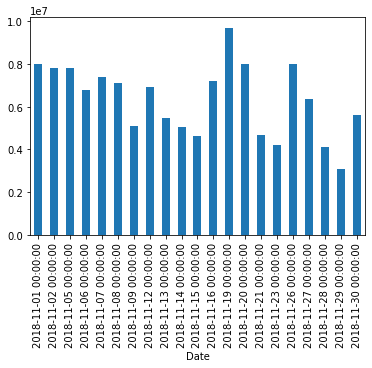

In [221]:
# Select the data ranging from 2018-11-01 to 2018-12-01
DF_TSLA_01 = DF_TSLA.loc['2018-11']
# use the Series.plot(), draw the bar figure for the 'volume' series
DF_TSLA_01['Volume'].plot(kind = 'bar')
plt.show()

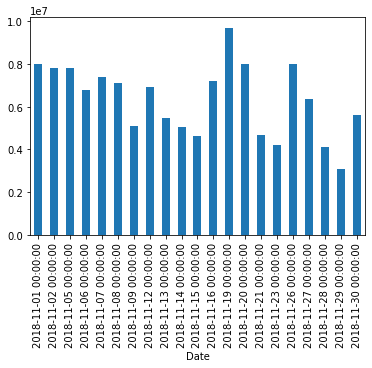

In [222]:
# Select the data ranging from 2018-11-01 to 2018-12-01
DF_TSLA_01 = DF_TSLA.loc['2018-11']
# use the Series.plot(), draw the bar figure for the 'volume' series
DF_TSLA_01['Volume'].plot(kind = 'bar')
plt.show()

In [223]:
DF_TSLA_01.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-01,338.260010,347.839996,334.730011,344.279999,344.279999,8000100
2018-11-02,343.739990,349.200012,340.910004,346.410004,346.410004,7808000
2018-11-05,340.500000,343.959991,330.140015,341.399994,341.399994,7831000
2018-11-06,339.070007,348.799988,336.089996,341.059998,341.059998,6762900
2018-11-07,343.339996,351.179993,340.799988,348.160004,348.160004,7374500


In the following, we examine the selected data.

画出Volume和Close的随时间变动百分比的柱状图，看是否有相联系（量价关系）。

In practice, we can set some criteira to define a signal indicating how the market is evolving. Here we set the threshold is 10%. Let's add two lines to indicate the signals.

https://baike.baidu.com/item/%E6%94%BE%E9%87%8F%E4%B8%8B%E8%B7%8C/9281829?fr=aladdin

In practice, we usually combine with the price changes to do the technical analysis. Furthermore, the relative change in volumes is used.

**Example 3**  均值回复(Mean Reversion)和趋势追踪(Trend Following)

在股票市场中有两种典型的投资策略:均值回归(Mean Reversion)和趋势追踪(Trend Following)。趋势追踪策略的特点在大行情的波动段找到有效的交易信号,不仅简单而且有效。而均值回归策略则是一种反趋势策略，一波大幅上涨后容易出现下跌，而一波大幅下跌后容易出现上涨。其特点是在振荡的在震荡的市场中非常有效，可以捕捉到小的机会。

There are two typical strategies, one is mean reversion, the other is trend following. 
- The feature of the trend following is that we can find the signal to trade from the fluctuation during a time period, during which there are some market events. The strategy is simple and effective.
- The mean reversion is a strategy opposite to the trend. It is due to the fact that price will go down after a long period of increasing, but it will increase after a large drop. The strategy is very effective in fluctuation and can help us to capture the small change.

**均值回归**

https://en.wikipedia.org/wiki/Mean_reversion_(finance)

In finance, mean reversion is the assumption that a stock's price will tend to move to the average price over time.

Using mean reversion in stock price analysis involves both identifying the trading range for a stock and computing the average price using analytical techniques taking into account considerations such as earnings, etc.

When the current market price is less than the average price, the stock is considered attractive for purchase, with the expectation that the price will rise. When the current market price is above the average price, the market price is expected to fall. In other words, deviations from the average price are expected to revert to the average.

（均值回归是指股票价格无论高于或低于均值(均衡价格水平)都会以很高的概率向均值回归。根据这个理论，股票价格总是围绕其均值上下波动。一种上涨或者下跌的趋势不管其延续的时间多长都不能永远持续下去，最终均值回归的规律一定会出现：涨得太多了，就会向均值移动下跌；跌得太多了，就会向均值移动上升。如果我们认为事物总要回归常态，并且基于这样的预期来做任何决策的时候，我们就是在应用均值回归的理论。）




首先我们将数据集划分为训练集和测试集，两个集合的长度一样。

**基本思路**

- 将数据集分为训练集和测试集 (Divide the dataset into two parts)
- 计算训练集的均值和标准差构建买入和卖出信号 (Construct the buy signals and selling signals)
- 将训练数据计算出的信号带入测试集，对比策略收益结果和基准收益结果
(Use the signals and compare the results of the strategy with the benchmark)

我们首先构造买入和卖出信号，并通过作图进行演示 (Construct the buy signals and selling signals by figures)

依据标准差构建买入与卖出信号

**操作**

* 通过buy_signal和sell_signal构建操作信号
* 将操作信号转化为持股状态

构建买入信号signal = 1

构建卖出信号signal = 0

画出测试结合序列'signal'的柱状图 （Draw the bar figure for series 'signal' in the test DF）

上面添加了新列的signal代表信号将要触发的操作，这里假设都是全仓操作，即一旦第一个信号成交后，后面虽然仍有信号发出，但是由于全仓买入，没有资金继续跟进了，卖出信号同理。所以连续的信号只有第一个是有实际的操作意思。

将keep列中的NAN使用向下填充的方式填充，使得keep可以代表最终的交易持股状态

### 收益计算

* 计算基准收益
* 计算使用均值回复策略的收益
* 可视化收益的情况对比

计算使用策略后的收益

对比策略和基准收益

**趋势追踪(Trend Following)**
https://en.wikipedia.org/wiki/Trend_following

趋势突破定义为当天收盘价格超过N天内的最高价格或者最低价格，N日趋势突破策略是指将超过最高价格作为买入信号买入股票持有，超过最低价格作为卖出信号。

构建买入信号

为了提升数据的准确性，将某个点的取值扩大到包含这个点的一段区间，用区间来进行判断，这个区间就是窗口。移动窗口(rolling)就是窗口向一端滑行，默认是从右往左，每次滑行并不是区间整块的滑行，而是一个单位一个单位的滑行，窗口长度固定。而扩展窗口（expanding window）

首先我们设置的窗口window=3，也就是3个数取一个均值。index 0,1 为NaN，是因为它们前面都不够3个数，等到index2 的时候，它的值是怎么算的呢，就是（index0+index1+index2)/3, index3 的值就是（index1+index2+index3)/3。

首先我们设置的窗口window=3，也就是3个数取一个均值。index 0,1 为NaN，是因为它们前面都不够3个数，等到index2 的时候，它的值是怎么算的呢，就是（index0+index1+index2)/3, index3 的值就是（index1+index2+index3)/3。

构建卖出信号

构建卖出信号

根据突破的定义来构建signal列，名称为signal_t

计算趋势突破策略的收益